In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Датасет 1 уменьшенный

In [2]:
df_1 = pd.read_csv('road_pixels_with_brightness1.csv')
df_2 = pd.read_csv('road_pixels_with_brightness2.csv')

In [3]:
# Проверка распределения классов
class_counts = df_1['class'].value_counts()
print(class_counts)

# Доля каждого класса
class_ratios = class_counts / len(df_1)
print(class_ratios)

class
0    2566482
1      54958
Name: count, dtype: int64
class
0    0.979035
1    0.020965
Name: count, dtype: float64


In [4]:
# Проверка распределения классов
class_counts = df_2['class'].value_counts()
print(class_counts)

# Доля каждого класса
class_ratios = class_counts / len(df_2)
print(class_ratios)

class
0    2563340
1      58100
Name: count, dtype: int64
class
0    0.977837
1    0.022163
Name: count, dtype: float64


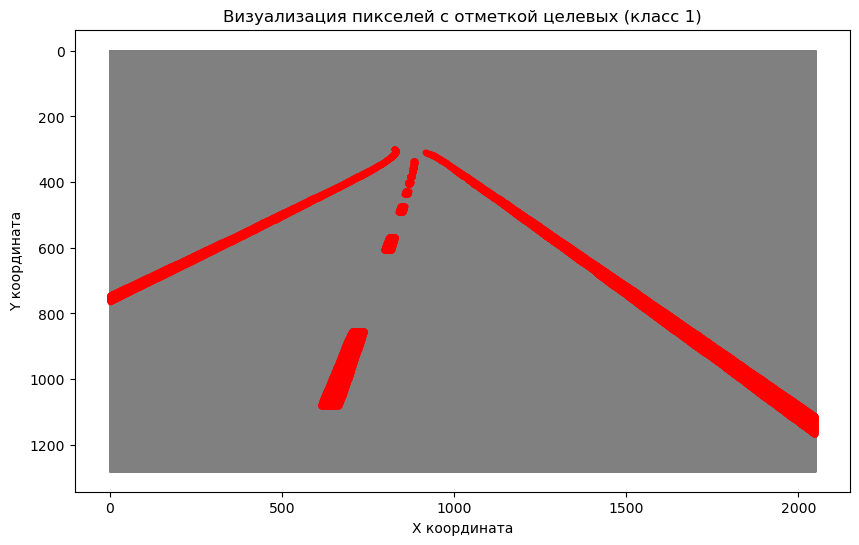

In [5]:
plt.figure(figsize=(10, 6))

# Отметим базовые пиксели (класс 0)
plt.scatter(df_1[df_1['class'] == 0]['x'], df_1[df_1['class'] == 0]['y'], c='gray', s=1, label='Класс 0')

# Отметим целевые пиксели (класс 1) красным
plt.scatter(df_1[df_1['class'] == 1]['x'], df_1[df_1['class'] == 1]['y'], c='red', s=10, label='Класс 1')

plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.title('Визуализация пикселей с отметкой целевых (класс 1)')
# Инвертируем ось y
plt.gca().invert_yaxis()
#plt.legend()
plt.show()


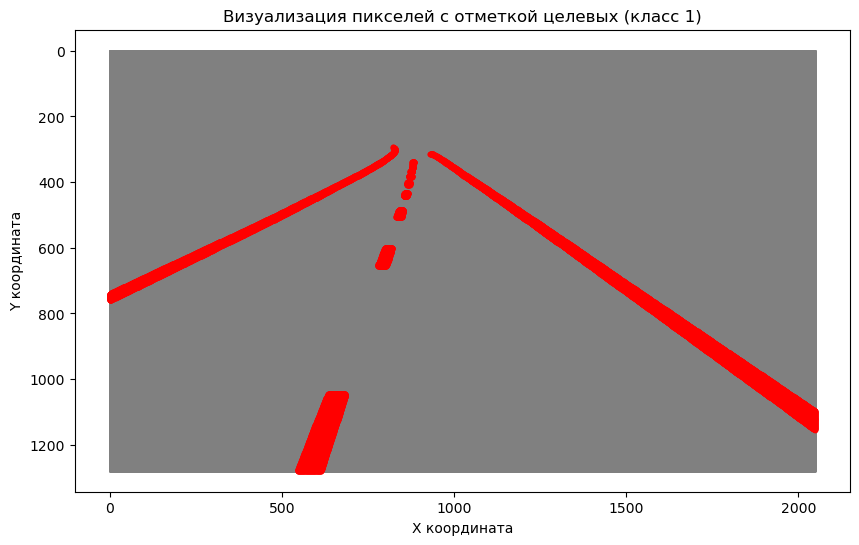

In [6]:
plt.figure(figsize=(10, 6))

# Отметим базовые пиксели (класс 0)
plt.scatter(df_2[df_2['class'] == 0]['x'], df_2[df_2['class'] == 0]['y'], c='gray', s=1, label='Класс 0')

# Отметим целевые пиксели (класс 1) красным
plt.scatter(df_2[df_2['class'] == 1]['x'], df_2[df_2['class'] == 1]['y'], c='red', s=10, label='Класс 1')

plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.title('Визуализация пикселей с отметкой целевых (класс 1)')
# Инвертируем ось y
plt.gca().invert_yaxis()
#plt.legend()

plt.show()

In [6]:
df.head()

,x,y,R,G,B,brightness,class
412249,601,201,37,43,33,40.066,0
412250,602,201,38,44,34,41.066,0
412251,603,201,37,43,33,40.066,0
412252,604,201,36,42,32,39.066,0
412253,605,201,39,45,35,42.066,0


### параметр stratify=y учитывает дисбаланс классов в датасете и делит выборку так, чтобы соотношение в test и train было таким же, как в исходном датасете (то есть делит с учетом пропорции).

сначала делим на тестовую и тренировочную выборки, потом стандартизируем каждую отдельно, потому что иначе будет влияние

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# Предположим, df_1 - тренировочные данные, df_2 - тестовые данные
X_train = df_1[['x', 'y', 'R', 'G', 'B', 'brightness']]  # Признаки тренировочной выборки
y_train = df_1['class']  # Целевая переменная тренировочной выборки

X_test = df_2[['x', 'y', 'R', 'G', 'B', 'brightness']]  # Признаки тестовой выборки
y_test = df_2['class']  # Целевая переменная тестовой выборки


### СНАЧАЛА делим на тест и трейн затем стандартизация

In [9]:
# Проверяем распределение классов
print("Распределение классов в тренировочной выборке:")
print(y_train.value_counts(normalize=True))

print("Распределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))

Распределение классов в тренировочной выборке:
class
0    0.979035
1    0.020965
Name: proportion, dtype: float64
Распределение классов в тестовой выборке:
class
0    0.977837
1    0.022163
Name: proportion, dtype: float64


In [10]:
#Стандартизация всех числовых столбцов
scaler = StandardScaler()

# Стандартизация на тренировочной выборке
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

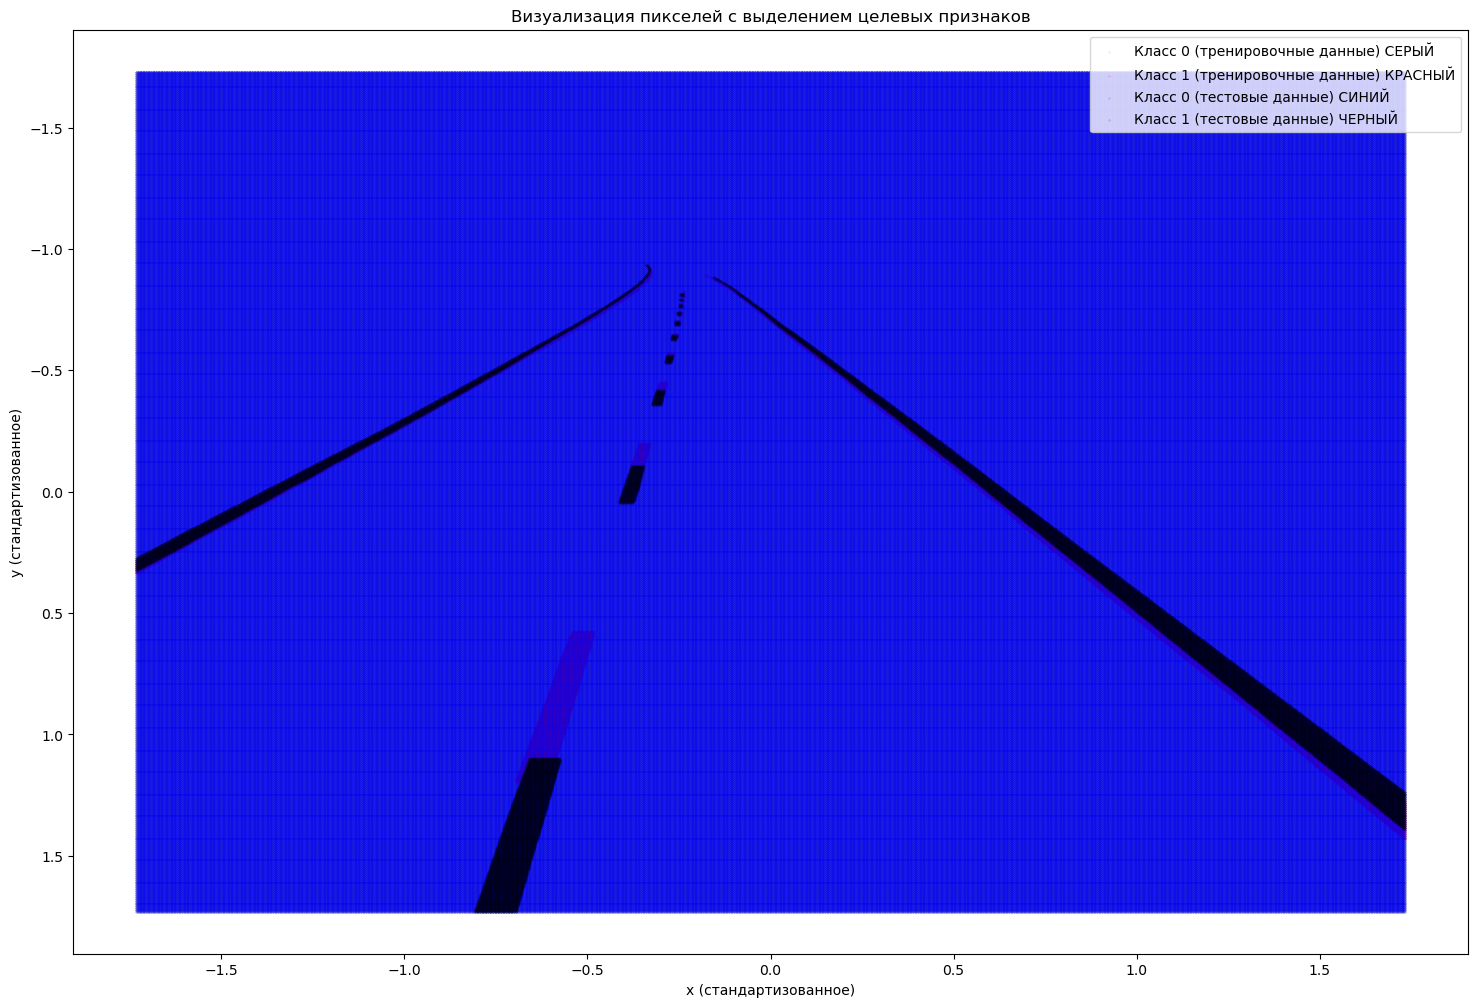

In [17]:
plt.figure(figsize=(18, 12))

# Визуализация точек из тренировочной выборки
plt.scatter(train_df['x'], train_df['y'], c='gray', s=0.01, label='Класс 0 (тренировочные данные) СЕРЫЙ')  

# Выделение целевых точек (класс 1) красным цветом
plt.scatter(train_df[train_df['class'] == 1]['x'], train_df[train_df['class'] == 1]['y'], c='red', s=0.01, label='Класс 1 (тренировочные данные) КРАСНЫЙ')  

# Визуализация точек из тестовой выборки с предсказанными значениями
# Сначала точки для предсказанных классов 0 (тестовые данные)
plt.scatter(test_df['x'], test_df['y'], c='blue', s=0.01, label='Класс 0 (тестовые данные) СИНИЙ')

# Затем выделим точки, предсказанные как класс 1
plt.scatter(test_df[test_df['class'] == 1]['x'], test_df[test_df['class'] == 1]['y'], c='black', s=0.01, label='Класс 1 (тестовые данные) ЧЕРНЫЙ')

# Добавление заголовков и подписей
plt.title('Визуализация пикселей с выделением целевых признаков')
plt.xlabel('x (стандартизованное)')
plt.ylabel('y (стандартизованное)')
#plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()
plt.legend(loc='upper right')
plt.show()

# Пробуем строить модели

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [15]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Параметр регуляризации
    'solver': ['liblinear', 'saga'],  # Алгоритмы оптимизации
    'max_iter': [100, 200, 300],  # Количество итераций
}

# Логистическая регрессия с GridSearchCV
log_reg = LogisticRegression(class_weight='balanced', random_state=88)
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, max_iter=100, solver=liblinear;, score=0.974 total time=   1.5s
[CV 2/5] END C=0.1, max_iter=100, solver=liblinear;, score=0.973 total time=   1.5s
[CV 3/5] END C=0.1, max_iter=100, solver=liblinear;, score=0.974 total time=   1.6s
[CV 4/5] END C=0.1, max_iter=100, solver=liblinear;, score=0.974 total time=   1.6s
[CV 5/5] END C=0.1, max_iter=100, solver=liblinear;, score=0.974 total time=   1.7s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=0.1, max_iter=100, solver=saga;, score=0.973 total time=  41.8s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=0.1, max_iter=100, solver=saga;, score=0.974 total time=  41.1s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..C=0.1, max_iter=100, solver=saga;, score=0.973 total time=  41.0s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=0.1, max_iter=100, solver=saga;, score=0.974 total time=  40.9s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=0.1, max_iter=100, solver=saga;, score=0.967 total time=  43.7s
[CV 1/5] END C=0.1, max_iter=200, solver=liblinear;, score=0.974 total time=   1.9s
[CV 2/5] END C=0.1, max_iter=200, solver=liblinear;, score=0.973 total time=   1.8s
[CV 3/5] END C=0.1, max_iter=200, solver=liblinear;, score=0.974 total time=   1.6s
[CV 4/5] END C=0.1, max_iter=200, solver=liblinear;, score=0.974 total time=   1.6s
[CV 5/5] END C=0.1, max_iter=200, solver=liblinear;, score=0.974 total time=   1.6s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=0.1, max_iter=200, solver=saga;, score=0.975 total time= 1.5min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=0.1, max_iter=200, solver=saga;, score=0.973 total time= 1.5min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..C=0.1, max_iter=200, solver=saga;, score=0.975 total time= 1.5min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=0.1, max_iter=200, solver=saga;, score=0.973 total time= 1.4min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=0.1, max_iter=200, solver=saga;, score=0.974 total time= 1.4min
[CV 1/5] END C=0.1, max_iter=300, solver=liblinear;, score=0.974 total time=   1.6s
[CV 2/5] END C=0.1, max_iter=300, solver=liblinear;, score=0.973 total time=   1.6s
[CV 3/5] END C=0.1, max_iter=300, solver=liblinear;, score=0.974 total time=   1.5s
[CV 4/5] END C=0.1, max_iter=300, solver=liblinear;, score=0.974 total time=   1.6s
[CV 5/5] END C=0.1, max_iter=300, solver=liblinear;, score=0.974 total time=   1.5s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=0.1, max_iter=300, solver=saga;, score=0.974 total time= 2.1min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=0.1, max_iter=300, solver=saga;, score=0.972 total time= 2.1min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..C=0.1, max_iter=300, solver=saga;, score=0.974 total time= 2.1min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=0.1, max_iter=300, solver=saga;, score=0.973 total time= 2.1min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=0.1, max_iter=300, solver=saga;, score=0.975 total time= 2.1min
[CV 1/5] END C=1, max_iter=100, solver=liblinear;, score=0.974 total time=   1.6s
[CV 2/5] END C=1, max_iter=100, solver=liblinear;, score=0.973 total time=   1.6s
[CV 3/5] END C=1, max_iter=100, solver=liblinear;, score=0.974 total time=   1.5s
[CV 4/5] END C=1, max_iter=100, solver=liblinear;, score=0.974 total time=   1.6s
[CV 5/5] END C=1, max_iter=100, solver=liblinear;, score=0.974 total time=   1.6s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=1, max_iter=100, solver=saga;, score=0.970 total time=  42.0s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=1, max_iter=100, solver=saga;, score=0.960 total time=  42.0s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=1, max_iter=100, solver=saga;, score=0.976 total time=  42.1s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=1, max_iter=100, solver=saga;, score=0.956 total time=  42.7s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=1, max_iter=100, solver=saga;, score=0.977 total time=  42.3s
[CV 1/5] END C=1, max_iter=200, solver=liblinear;, score=0.974 total time=   1.7s
[CV 2/5] END C=1, max_iter=200, solver=liblinear;, score=0.973 total time=   1.6s
[CV 3/5] END C=1, max_iter=200, solver=liblinear;, score=0.974 total time=   1.7s
[CV 4/5] END C=1, max_iter=200, solver=liblinear;, score=0.974 total time=   1.5s
[CV 5/5] END C=1, max_iter=200, solver=liblinear;, score=0.974 total time=   1.6s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=1, max_iter=200, solver=saga;, score=0.963 total time= 1.4min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=1, max_iter=200, solver=saga;, score=0.975 total time= 1.4min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=1, max_iter=200, solver=saga;, score=0.973 total time= 1.4min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=1, max_iter=200, solver=saga;, score=0.975 total time= 1.4min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=1, max_iter=200, solver=saga;, score=0.977 total time= 1.5min
[CV 1/5] END C=1, max_iter=300, solver=liblinear;, score=0.974 total time=   1.9s
[CV 2/5] END C=1, max_iter=300, solver=liblinear;, score=0.973 total time=   1.9s
[CV 3/5] END C=1, max_iter=300, solver=liblinear;, score=0.974 total time=   1.9s
[CV 4/5] END C=1, max_iter=300, solver=liblinear;, score=0.974 total time=   2.0s
[CV 5/5] END C=1, max_iter=300, solver=liblinear;, score=0.974 total time=   2.0s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=1, max_iter=300, solver=saga;, score=0.968 total time= 2.1min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=1, max_iter=300, solver=saga;, score=0.968 total time= 2.1min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=1, max_iter=300, solver=saga;, score=0.973 total time= 2.1min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=1, max_iter=300, solver=saga;, score=0.971 total time= 2.1min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=1, max_iter=300, solver=saga;, score=0.974 total time= 2.1min
[CV 1/5] END C=10, max_iter=100, solver=liblinear;, score=0.974 total time=   1.6s
[CV 2/5] END C=10, max_iter=100, solver=liblinear;, score=0.973 total time=   1.5s
[CV 3/5] END C=10, max_iter=100, solver=liblinear;, score=0.974 total time=   1.6s
[CV 4/5] END C=10, max_iter=100, solver=liblinear;, score=0.974 total time=   1.6s
[CV 5/5] END C=10, max_iter=100, solver=liblinear;, score=0.974 total time=   1.6s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=10, max_iter=100, solver=saga;, score=0.969 total time=  41.8s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=10, max_iter=100, solver=saga;, score=0.955 total time=  41.9s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=10, max_iter=100, solver=saga;, score=0.972 total time=  41.7s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=10, max_iter=100, solver=saga;, score=0.943 total time=  41.8s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=10, max_iter=100, solver=saga;, score=0.977 total time=  42.1s
[CV 1/5] END C=10, max_iter=200, solver=liblinear;, score=0.974 total time=   1.6s
[CV 2/5] END C=10, max_iter=200, solver=liblinear;, score=0.973 total time=   1.6s
[CV 3/5] END C=10, max_iter=200, solver=liblinear;, score=0.974 total time=   1.6s
[CV 4/5] END C=10, max_iter=200, solver=liblinear;, score=0.974 total time=   1.5s
[CV 5/5] END C=10, max_iter=200, solver=liblinear;, score=0.974 total time=   1.6s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=10, max_iter=200, solver=saga;, score=0.969 total time= 1.4min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=10, max_iter=200, solver=saga;, score=0.970 total time= 1.4min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=10, max_iter=200, solver=saga;, score=0.970 total time= 1.4min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=10, max_iter=200, solver=saga;, score=0.980 total time= 1.5min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=10, max_iter=200, solver=saga;, score=0.967 total time= 1.5min
[CV 1/5] END C=10, max_iter=300, solver=liblinear;, score=0.974 total time=   1.8s
[CV 2/5] END C=10, max_iter=300, solver=liblinear;, score=0.973 total time=   1.8s
[CV 3/5] END C=10, max_iter=300, solver=liblinear;, score=0.974 total time=   1.9s
[CV 4/5] END C=10, max_iter=300, solver=liblinear;, score=0.974 total time=   1.7s
[CV 5/5] END C=10, max_iter=300, solver=liblinear;, score=0.974 total time=   1.8s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=10, max_iter=300, solver=saga;, score=0.984 total time= 2.6min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=10, max_iter=300, solver=saga;, score=0.965 total time= 2.3min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=10, max_iter=300, solver=saga;, score=0.970 total time= 2.3min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=10, max_iter=300, solver=saga;, score=0.970 total time= 2.9min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=10, max_iter=300, solver=saga;, score=0.957 total time= 3.1min
[CV 1/5] END C=100, max_iter=100, solver=liblinear;, score=0.974 total time=   3.0s
[CV 2/5] END C=100, max_iter=100, solver=liblinear;, score=0.973 total time=   3.0s
[CV 3/5] END C=100, max_iter=100, solver=liblinear;, score=0.974 total time=   2.8s
[CV 4/5] END C=100, max_iter=100, solver=liblinear;, score=0.974 total time=   2.8s
[CV 5/5] END C=100, max_iter=100, solver=liblinear;, score=0.974 total time=   2.7s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=100, max_iter=100, solver=saga;, score=0.969 total time= 1.0min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=100, max_iter=100, solver=saga;, score=0.964 total time=  58.7s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..C=100, max_iter=100, solver=saga;, score=0.972 total time= 1.0min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=100, max_iter=100, solver=saga;, score=0.973 total time= 1.1min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=100, max_iter=100, solver=saga;, score=0.948 total time= 1.0min
[CV 1/5] END C=100, max_iter=200, solver=liblinear;, score=0.974 total time=   3.0s
[CV 2/5] END C=100, max_iter=200, solver=liblinear;, score=0.973 total time=   2.8s
[CV 3/5] END C=100, max_iter=200, solver=liblinear;, score=0.974 total time=   2.8s
[CV 4/5] END C=100, max_iter=200, solver=liblinear;, score=0.974 total time=   2.9s
[CV 5/5] END C=100, max_iter=200, solver=liblinear;, score=0.974 total time=   2.8s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=100, max_iter=200, solver=saga;, score=0.963 total time= 2.1min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=100, max_iter=200, solver=saga;, score=0.971 total time= 1.5min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..C=100, max_iter=200, solver=saga;, score=0.966 total time= 1.4min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=100, max_iter=200, solver=saga;, score=0.971 total time= 1.4min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=100, max_iter=200, solver=saga;, score=0.969 total time= 1.9min
[CV 1/5] END C=100, max_iter=300, solver=liblinear;, score=0.974 total time=   2.6s
[CV 2/5] END C=100, max_iter=300, solver=liblinear;, score=0.973 total time=   2.8s
[CV 3/5] END C=100, max_iter=300, solver=liblinear;, score=0.974 total time=   8.5s
[CV 4/5] END C=100, max_iter=300, solver=liblinear;, score=0.974 total time=   2.2s
[CV 5/5] END C=100, max_iter=300, solver=liblinear;, score=0.974 total time=   3.0s


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=100, max_iter=300, solver=saga;, score=0.966 total time= 3.0min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=100, max_iter=300, solver=saga;, score=0.973 total time= 2.7min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..C=100, max_iter=300, solver=saga;, score=0.971 total time= 2.9min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=100, max_iter=300, solver=saga;, score=0.967 total time= 2.8min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=100, max_iter=300, solver=saga;, score=0.969 total time= 2.8min


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=88),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=3)

In [16]:
print("Лучшие гиперпараметры: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

Лучшие гиперпараметры:  {'C': 0.1, 'max_iter': 200, 'solver': 'saga'}


In [17]:
print("Лучшие гиперпараметры: ", grid_search.best_params_)

Лучшие гиперпараметры:  {'C': 0.1, 'max_iter': 200, 'solver': 'saga'}


In [18]:
best_model = grid_search.best_estimator_

# Предсказания
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Вероятности для ROC-AUC

# Метрики
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Точность на тестовой выборке: {accuracy:.4f}')
print(f'ROC-AUC на тестовой выборке: {roc_auc:.4f}')

Точность на тестовой выборке: 0.9733
ROC-AUC на тестовой выборке: 0.9959


In [19]:
# Повторяем для тестовых данных
X_test_df = pd.DataFrame(X_test, columns=['x', 'y', 'R', 'G', 'B', 'brightness'])
y_test_df = pd.DataFrame(y_pred, columns=['class'])

# Сбрасываем индексы для согласования
X_test_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Объединяем X_test и y_test в один DataFrame, игнорируя NaN
test_df = pd.concat([X_test_df, y_test_df], axis=1)


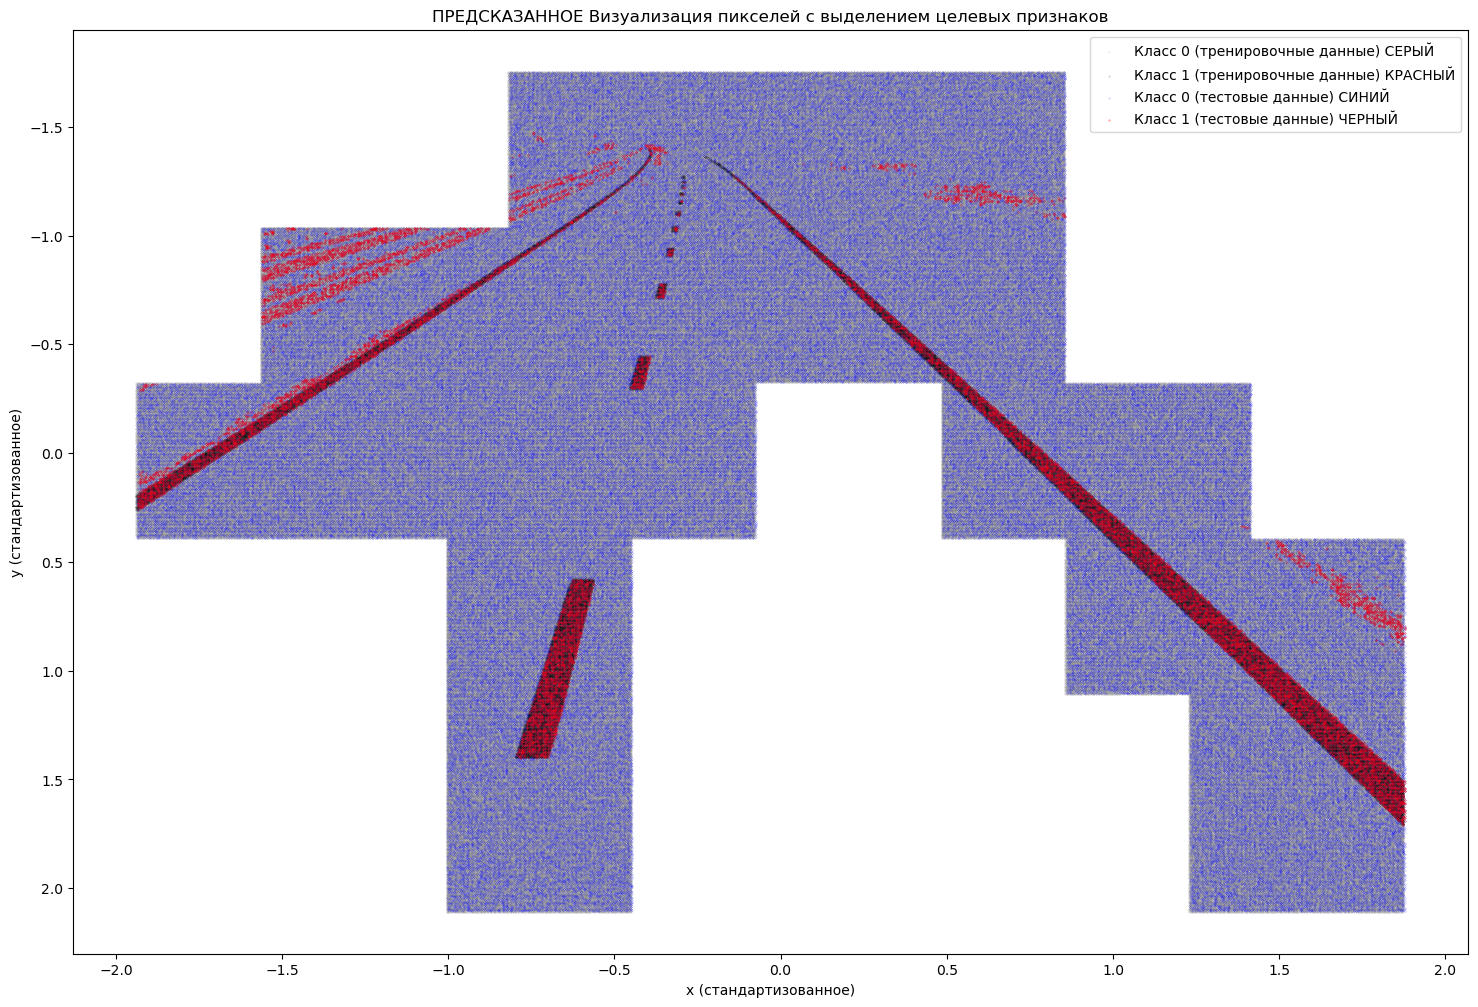

In [20]:
plt.figure(figsize=(18, 12))

# Визуализация точек из тренировочной выборки
plt.scatter(train_df['x'], train_df['y'], c='gray', s=0.01, label='Класс 0 (тренировочные данные) СЕРЫЙ')  

# Выделение целевых точек (класс 1) красным цветом
plt.scatter(train_df[train_df['class'] == 1]['x'], train_df[train_df['class'] == 1]['y'], c='black', s=0.01, label='Класс 1 (тренировочные данные) КРАСНЫЙ')  

# Визуализация точек из тестовой выборки с предсказанными значениями
# Сначала точки для предсказанных классов 0 (тестовые данные)
plt.scatter(test_df['x'], test_df['y'], c='blue', s=0.01, label='Класс 0 (тестовые данные) СИНИЙ')

# Затем выделим точки, предсказанные как класс 1
plt.scatter(test_df[test_df['class'] == 1]['x'], test_df[test_df['class'] == 1]['y'], c='red', s=0.05, label='Класс 1 (тестовые данные) ЧЕРНЫЙ')

# Добавление заголовков и подписей
plt.title('ПРЕДСКАЗАННОЕ Визуализация пикселей с выделением целевых признаков')
plt.xlabel('x (стандартизованное)')
plt.ylabel('y (стандартизованное)')
#plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()
plt.legend(loc='upper right')
plt.show()

### Также были построены модели KNN и Метод опорных векторов

# Актуальное

In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Время обучения модели: 6.9429 секунд
Время предсказания: 250.9891 секунд
Точность модели: 0.9989933013916016
ROC AUC: 0.9925310102016079

Отчет классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2563340
           1       0.98      0.97      0.98     58100

    accuracy                           1.00   2621440
   macro avg       0.99      0.98      0.99   2621440
weighted avg       1.00      1.00      1.00   2621440



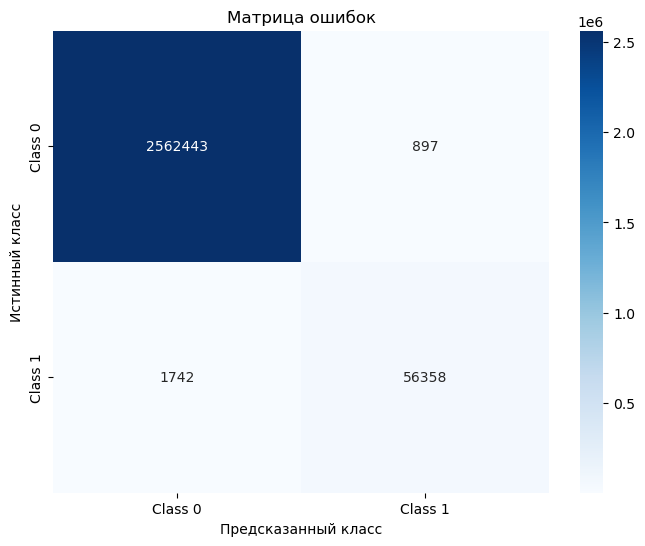

In [5]:
best_params = {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

# Инициализация модели с заданными гиперпараметрами
knn = KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    weights=best_params['weights'],
    metric=best_params['metric']
)

# Замер времени обучения модели
start_time = time.time()
knn.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Время обучения модели: {train_time:.4f} секунд")

# Замер времени предсказания
start_time = time.time()
y_pred = knn.predict(X_test)
predict_time = time.time() - start_time
print(f"Время предсказания: {predict_time:.4f} секунд")

# Метрики
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

# Рассчитаем ROC AUC для бинарной классификации
if hasattr(knn, "predict_proba"):
    y_prob = knn.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC AUC: {roc_auc}")
else:
    print("Модель не поддерживает predict_proba. ROC AUC не может быть рассчитан.")

# Отчет классификации
print("\nОтчет классификации:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

In [6]:
# Повторяем для тестовых данных
X_test_df = pd.DataFrame(X_test, columns=['x', 'y', 'R', 'G', 'B', 'brightness'])
y_test_df = pd.DataFrame(y_pred, columns=['class'])

# Сбрасываем индексы для согласования
X_test_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Объединяем X_test и y_test в один DataFrame, игнорируя NaN
test_df = pd.concat([X_test_df, y_test_df], axis=1)


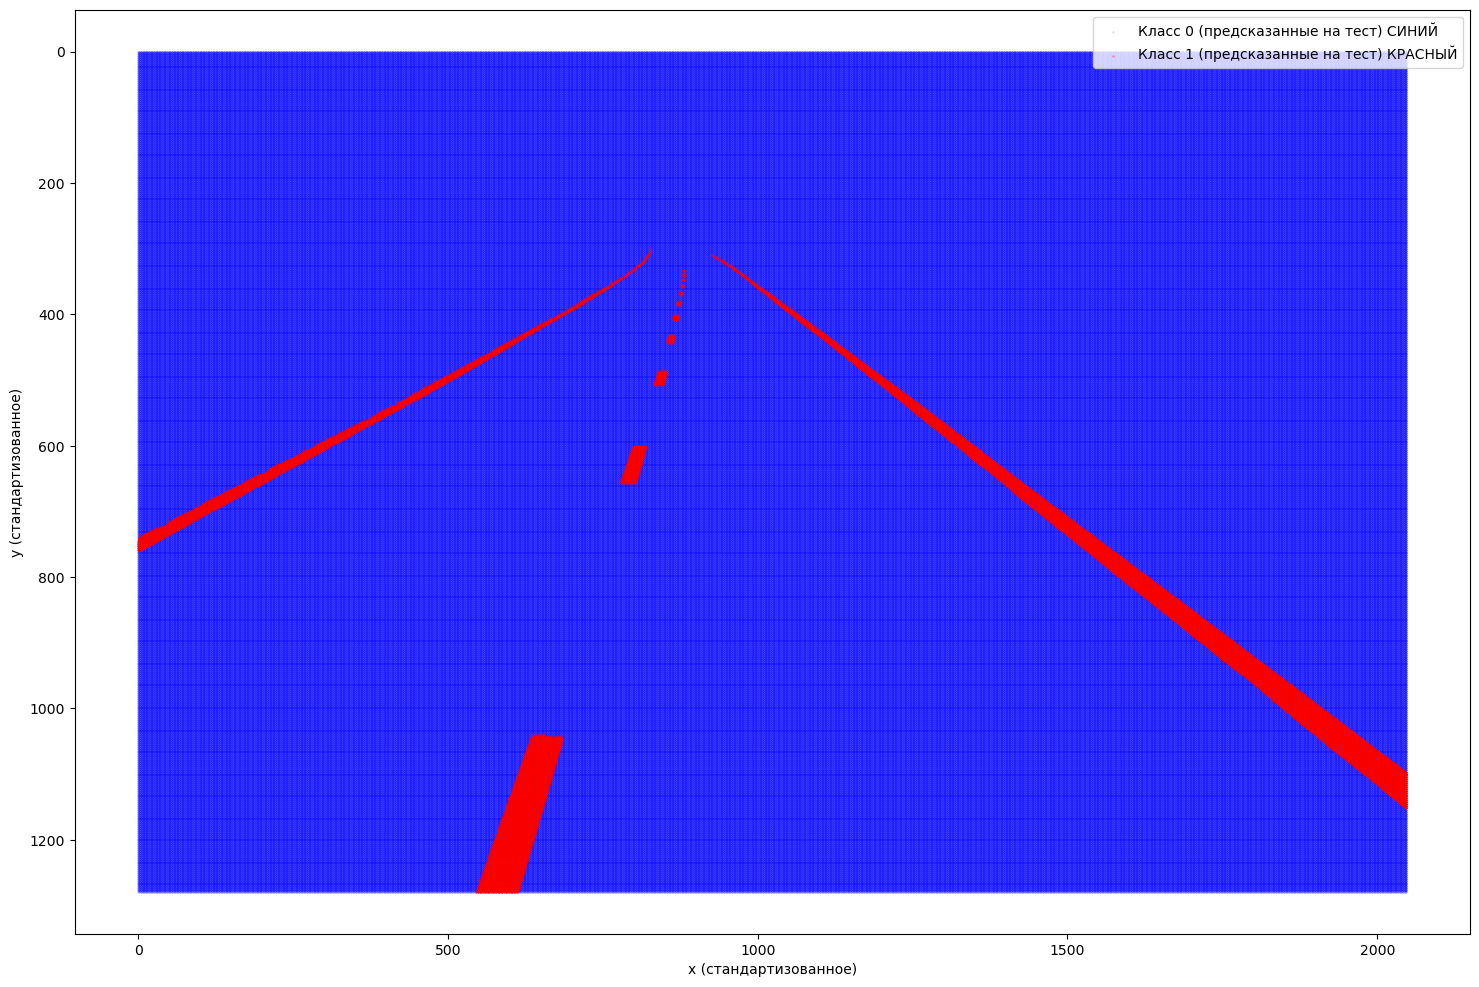

In [8]:
plt.figure(figsize=(18, 12))

# Визуализация точек из тестовой выборки с предсказанными значениями
# Сначала точки для предсказанных классов 0 (тестовые данные)
plt.scatter(test_df['x'], test_df['y'], c='blue', s=0.01, label='Класс 0 (предсказанные на тест) СИНИЙ')

# Затем выделим точки, предсказанные как класс 1
plt.scatter(test_df[test_df['class'] == 1]['x'], test_df[test_df['class'] == 1]['y'], c='red', s=0.05, label='Класс 1 (предсказанные на тест) КРАСНЫЙ')

# Добавление заголовков и подписей
plt.xlabel('x (стандартизованное)')
plt.ylabel('y (стандартизованное)')
#plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()
plt.legend(loc='upper right')
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_1 = pd.read_csv('road_pixels_with_brightness1.csv')
df_2 = pd.read_csv('road_pixels_with_brightness2.csv')

In [4]:
# Предположим, df_1 - тренировочные данные, df_2 - тестовые данные
X_train = df_1[['x', 'y', 'R', 'G', 'B', 'brightness']]  # Признаки тренировочной выборки
y_train = df_1['class']  # Целевая переменная тренировочной выборки

X_test = df_2[['x', 'y', 'R', 'G', 'B', 'brightness']]  # Признаки тестовой выборки
y_test = df_2['class']  # Целевая переменная тестовой выборки

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Создаем k-NN с минимальными настройками (k=3)
baseline_knn = KNeighborsClassifier(n_neighbors=3)
baseline_knn.fit(X_train, y_train)

# Предсказания
y_pred_knn = baseline_knn.predict(X_test)

# Оценка качества
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Baseline KNN Accuracy: {accuracy_knn}")
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))


Baseline KNN Accuracy: 0.9988876342773437
Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2563340
           1       0.98      0.97      0.97     58100

    accuracy                           1.00   2621440
   macro avg       0.99      0.98      0.99   2621440
weighted avg       1.00      1.00      1.00   2621440



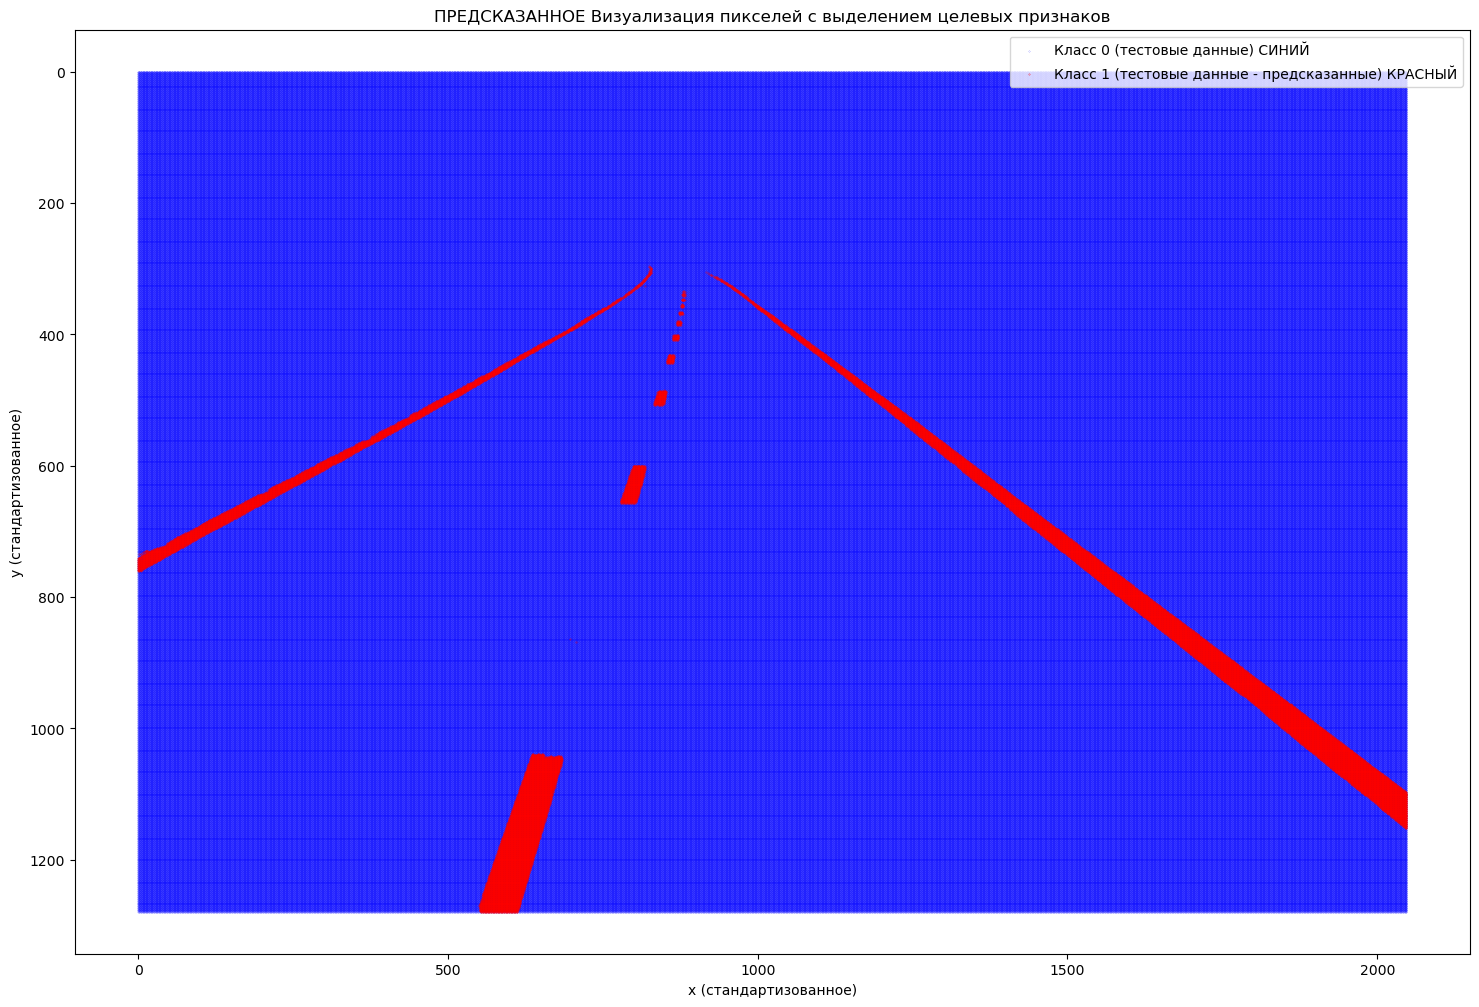

In [19]:
# Повторяем для тестовых данных
X_test_df = pd.DataFrame(X_test, columns=['x', 'y', 'R', 'G', 'B', 'brightness'])
y_test_df = pd.DataFrame(y_pred_knn, columns=['class'])

# Сбрасываем индексы для согласования
X_test_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Объединяем X_test и y_test в один DataFrame, игнорируя NaN
test_df = pd.concat([X_test_df, y_test_df], axis=1)


plt.figure(figsize=(18, 12))

# Визуализация точек из тестовой выборки с предсказанными значениями
# Сначала точки для предсказанных классов 0 (тестовые данные)
plt.scatter(test_df['x'], test_df['y'], c='blue', s=0.01, label='Класс 0 (тестовые данные) СИНИЙ')

# Затем выделим точки, предсказанные как класс 1
plt.scatter(test_df[test_df['class'] == 1]['x'], test_df[test_df['class'] == 1]['y'], c='red', s=0.05, label='Класс 1 (тестовые данные - предсказанные) КРАСНЫЙ')

# Добавление заголовков и подписей
plt.title('ПРЕДСКАЗАННОЕ Визуализация пикселей с выделением целевых признаков')
plt.xlabel('x (стандартизованное)')
plt.ylabel('y (стандартизованное)')
#plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()
plt.legend(loc='upper right')
plt.show()

In [22]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Создаем baseline модель (предсказывает наиболее частый класс)
baseline_clf = DummyClassifier(strategy="most_frequent")
baseline_clf.fit(X_train, y_train)

# Делаем предсказания
y_pred_baseline = baseline_clf.predict(X_test)

# Оцениваем качество
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline accuracy: {baseline_accuracy}")


Baseline accuracy: 0.9778366088867188


In [32]:
y_test_df['class'].unique()

array([0], dtype=int64)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Создаем логистическую регрессию с минимальными настройками
baseline_log_reg = LogisticRegression(random_state=88)
baseline_log_reg.fit(X_train, y_train)

# Предсказания
y_pred_log_reg = baseline_log_reg.predict(X_test)

# Оценка качества
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Baseline Logistic Regression Accuracy: {accuracy_log_reg}")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))


Baseline Logistic Regression Accuracy: 0.9961837768554688
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2563340
           1       0.98      0.84      0.91     58100

    accuracy                           1.00   2621440
   macro avg       0.99      0.92      0.95   2621440
weighted avg       1.00      1.00      1.00   2621440



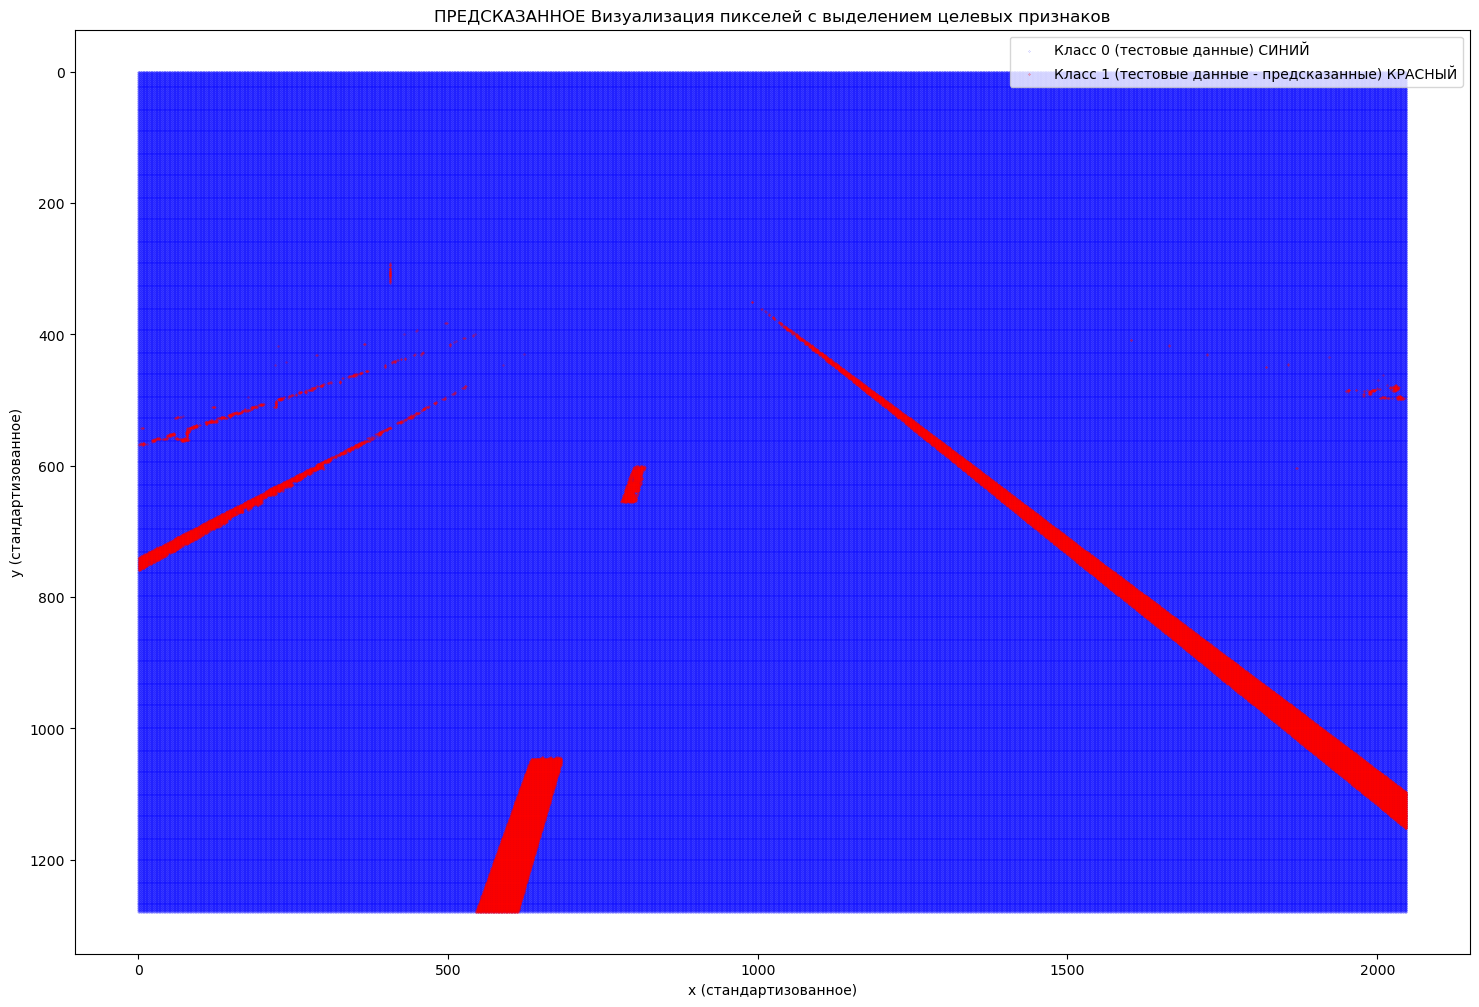

In [37]:
# Повторяем для тестовых данных
X_test_df = pd.DataFrame(X_test, columns=['x', 'y', 'R', 'G', 'B', 'brightness'])
y_test_df = pd.DataFrame(y_pred_log_reg, columns=['class'])

# Сбрасываем индексы для согласования
X_test_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Объединяем X_test и y_test в один DataFrame, игнорируя NaN
test_df = pd.concat([X_test_df, y_test_df], axis=1)


plt.figure(figsize=(18, 12))

# Визуализация точек из тестовой выборки с предсказанными значениями
# Сначала точки для предсказанных классов 0 (тестовые данные)
plt.scatter(test_df['x'], test_df['y'], c='blue', s=0.01, label='Класс 0 (тестовые данные) СИНИЙ')

# Затем выделим точки, предсказанные как класс 1
plt.scatter(test_df[test_df['class'] == 1]['x'], test_df[test_df['class'] == 1]['y'], c='red', s=0.05, label='Класс 1 (тестовые данные - предсказанные) КРАСНЫЙ')

# Добавление заголовков и подписей
plt.title('ПРЕДСКАЗАННОЕ Визуализация пикселей с выделением целевых признаков')
plt.xlabel('x (стандартизованное)')
plt.ylabel('y (стандартизованное)')
#plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()
plt.legend(loc='upper right')
plt.show()